# Visualization of synthetic datasets


**Requisites**
- `cmocean`

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import cmocean
%matplotlib inline

from src.data.import_data import import_df_from_zip_pkl
from src.data.make_dataset import downsample_dataframe
import numpy as np

In [2]:
plt.rcParams['axes.linewidth'] = 2.5
#plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

cmap = cmocean.cm.solar

In [3]:
synth_name  = ["basic", "soil", "weather", "soil_weather"]
df          = {}
df_day      = {}
index       = 13
for name in synth_name:
    path_to_zip = "../data/raw/synthetic_" + name + ".zip"
    df[name]    = import_df_from_zip_pkl(path_to_zip, index=index, verbose=False)
    # remove february 29th
    df[name][(df[name].index.day != 29) & (df[name].index.month != 2)]
    df_day[name] = downsample_dataframe(df[name], night_method="basic", clip_method="universal")

One synthetic type

/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/home/julius/Aug20_Epri/.env/lib/python3.6

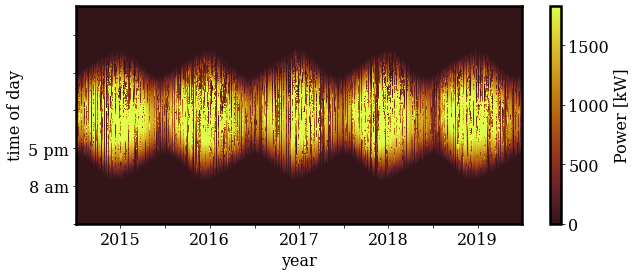

In [4]:
name    = synth_name[3]

days    = np.unique(df[name].index.date)
minutes = np.unique(df[name].minute_of_day)

yi, xi  = np.meshgrid(minutes, days)
zi      = df[name].Power.to_numpy()

fig, ax = plt.subplots(figsize=(10, 4))
im = ax.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap, rasterized=True)
fig.colorbar(im, label="Power [kW]")

labels_x = [item.get_text() for item in ax.get_xticklabels()]
labels_y = [item.get_text() for item in ax.get_yticklabels()]
labels_y = ["", "8 am", "5 pm"]
labels_x = ["2015", "", "2016", "", "2017", "", "2018", "", "2019", ""]
ax.set_yticklabels(labels_y)
ax.set_xticklabels(labels_x)#, rotation=45)
ax.set_xlabel("year")
ax.set_ylabel("time of day")
fig.savefig("../reports/figures/power_" + name + ".png", bbox_inches='tight')

/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()
/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/julius/Aug20_Epr

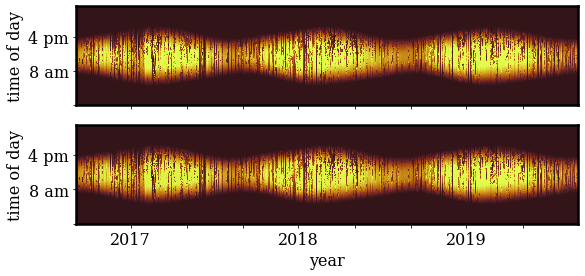

In [5]:
# Plot soil_weather with and without degrdation

name    = synth_name[3]

dff     = df[name][df[name].index.year  > 2016]

days    = np.unique(dff.index.date)
minutes = np.unique(dff.minute_of_day)

yi, xi  = np.meshgrid(minutes, days)
zi      = dff.Power.to_numpy()

zi_no_deg = (dff.Power / dff.Degradation).to_numpy()

fig, axs = plt.subplots(2, figsize=(9, 4))
im = axs[0].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap, rasterized=True)
im = axs[1].pcolormesh(xi, yi, zi_no_deg.reshape(xi.shape), cmap=cmap, rasterized=True)

# fig.colorbar(im, label="Power [kW]")

labels_x = [item.get_text() for item in axs[0].get_xticklabels()]
labels_y = [item.get_text() for item in axs[0].get_yticklabels()]

labels_y = ["", "8 am", "4 pm", ""]

axs[0].set_yticklabels(labels_y)
axs[0].set_xticklabels(labels_x)
axs[0].set_ylabel("time of day")

labels_x = ["2017", "", "", "2018","", "", "2019", ""]
axs[1].set_yticklabels(labels_y)
axs[1].set_xticklabels(labels_x)#, rotation=45)
axs[1].set_xlabel("year")
axs[1].set_ylabel("time of day")
fig.savefig("../reports/figures/power_" + name + "_deg.png", bbox_inches='tight')

/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


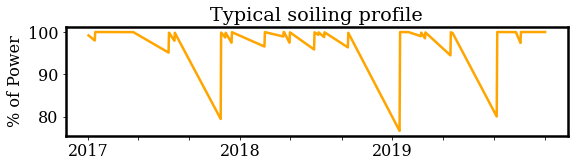

In [6]:
# Plot a typical soiling profile

name    = synth_name[1]

dff     = df[name][df[name].index.year  > 2016]

fig, ax = plt.subplots(figsize=(9,2))
ax.set_title("Typical soiling profile")
ax.plot(dff.Soiling * 100, color='orange', lw=2.5)
ax.set_ylabel("% of Power")

labels_x = [item.get_text() for item in axs[0].get_xticklabels()]
labels_x = ["2017", "", "", "2018","", "", "2019", ""]
ax.set_xticklabels(labels_x)
fig.savefig("../reports/figures/power_" + name + "_soiling_prof.png", bbox_inches='tight', transparent=True)